### Problem Statement
The objectives of the project is: 
1. Analyze the Salary based on Experiences
2. Predict the Salary Based on experiences Using Linear Regression
3. Find the mean squared error of the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Salary.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


C:\Users\Binu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Binu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


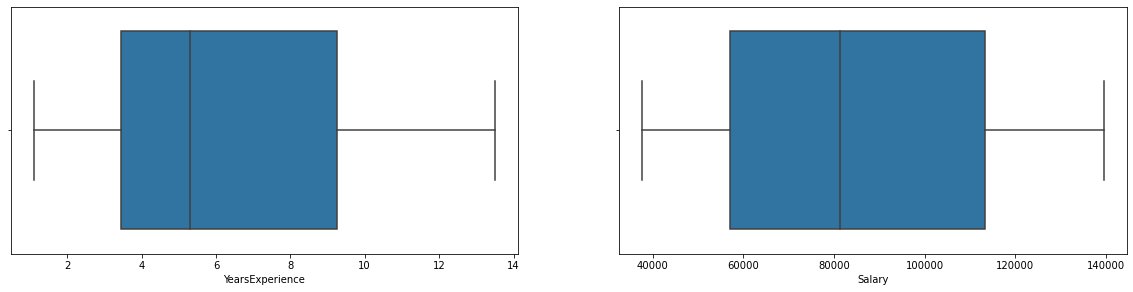

In [7]:
plt.figure(figsize =(20,10))

plt.subplot(2,2,1)
sns.boxplot(data["YearsExperience"])

plt.subplot(2,2,2)
sns.boxplot(data["Salary"]);

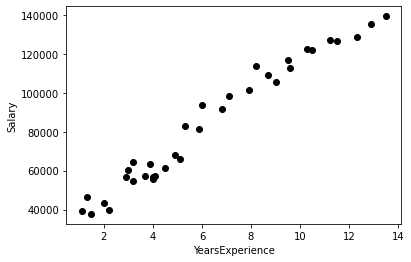

In [8]:
plt.scatter(data["YearsExperience"],data["Salary"], color="Black")
plt.xlabel("YearsExperience")
plt.ylabel("Salary");

### Train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = data.drop("Salary", axis=1)

In [11]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [12]:
y = data["Salary"]

In [13]:
 y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size =0.2 , random_state=42)

### Train Model and predict Salary Based on Experience

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model =LinearRegression()

In [17]:
model

LinearRegression()

In [18]:
model.fit(xtrain,ytrain)

LinearRegression()

In [19]:
ypred = model.predict(xtest)

In [20]:
print("Actual y ",xtest , ytest)
print("Y pred", ypred)
 

Actual y      YearsExperience
26              9.5
13              4.1
24              8.7
21              7.1
15              4.9
29             10.5
19              6.0 26    116969
13     57081
24    109431
21     98273
15     67938
29    121872
19     93940
Name: Salary, dtype: int64
Y pred [110576.91706292  64251.57268882 103713.90308157  89987.87511888
  71114.58667017 119155.68453961  80551.23089452]


In [21]:
data["Predicted Salary"]= model.predict(x)

In [22]:
data.head()

,YearsExperience,Salary,Predicted Salary
0,1.1,39343,38515.270259
1,1.3,46205,40231.023754
2,1.5,37731,41946.777249
3,2.0,43525,46236.160988
4,2.2,39891,47951.914483


In [23]:
model.score(xtest,ytest)

0.8914234140042779

In [24]:
print("intercept", model.intercept_)

intercept 29078.626034406887


In [25]:
print("slope", model.coef_)

slope [8578.76747669]


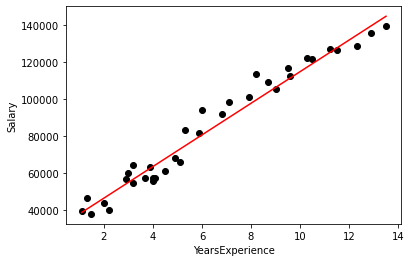

In [26]:
plt.plot(data["YearsExperience"],data["Predicted Salary"], color="Red")
plt.scatter(data["YearsExperience"], data["Salary"], color="Black")
plt.xlabel("YearsExperience")
plt.ylabel("Salary");

# MSE

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mse =mean_squared_error(data["Salary"],data["Predicted Salary"])

In [29]:
mse

35863529.28605519